In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MinDistAnalysis:
    def __init__(self, txt_file_path):
        # Initialize the file paths
        self.txt_file_path = txt_file_path
        self.csv_file_path = 'minDistData.csv'  # Output .csv file path
        self.output_dir = 'output'
        os.makedirs(self.output_dir, exist_ok=True)
        self.output_file_path = os.path.join(self.output_dir, 'AnalysisOutput.txt')

    def append_to_output(self, text):
        with open(self.output_file_path, 'a') as f:
            f.write(text + '\n')

    def convert_txt_to_csv(self):
        # Define your custom column names
        column_names = ['Frame', 'MinDist']  # Replace with your actual column names
        
        # Read the .txt file while skipping the first line, assigning custom column names, and handling whitespace
        data = pd.read_csv(self.txt_file_path, sep=r'\s+', skiprows=1, names=column_names)

        # Save the data as .csv
        data.to_csv(self.csv_file_path, index=False)
        self.append_to_output(f"Data successfully converted to {self.csv_file_path}")
        
    def analyze_and_plot(self):
        # Load the CSV data
        data = pd.read_csv(self.csv_file_path)

        # Extract both columns
        frames = data['Frame']
        min_dist = data['MinDist']

        # Calculate the statistics
        max_value = min_dist.max()
        min_value = min_dist.min()
        average = min_dist.mean()
        std_dev = min_dist.std()

        # Find the frames corresponding to the max and min values
        max_frame = data.loc[min_dist.idxmax(), 'Frame']
        min_frame = data.loc[min_dist.idxmin(), 'Frame']

        # Find the top 5 largest and smallest values
        top_5_largest = data.nlargest(5, 'MinDist')
        top_5_smallest = data.nsmallest(5, 'MinDist')

        # Create a text output
        output_text = (
            f"Maximum Distance: {max_value} (Frame: {max_frame})\n"
            f"Minimum Distance: {min_value} (Frame: {min_frame})\n"
            f"Average Distance: {average}\n"
            f"Distance Standard Deviation: {std_dev}\n\n"
            f"Top 5 Largest Values and Corresponding Frames:\n"
            f"{top_5_largest[['Frame', 'MinDist']].to_string(index=False)}\n\n"
            f"Top 5 Smallest Values and Corresponding Frames:\n"
            f"{top_5_smallest[['Frame', 'MinDist']].to_string(index=False)}\n"
        )

        # Append the text output to the file
        self.append_to_output(output_text)

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.plot(data['Frame'], data['MinDist'], color='purple', alpha=0.75, linewidth=.3)

        # Set X and Y axes limits
        plt.xlim(0, 1000000)

        # Add horizontal line for the average value
        plt.hlines(y=average, xmin=0, xmax=1000000, color='r', linestyle='-')

        # Add labels and title, ticks
        plt.xlabel('ns')
        plt.ylabel('Minimum Distance')
        plt.title('Minimum Distance vs. Time')

        ticks = np.arange(0, 1_000_001, 100_000)
        plt.xticks(ticks=ticks, labels=[f'{int(tick):,}' for tick in ticks], rotation=45)

        # Save the plot to a file
        plot_file_path = os.path.join(self.output_dir, 'minDistPlot.png')
        plt.savefig(plot_file_path)

        # Show the plot
        plt.show()

class RMSDAnalysis:
    def __init__(self, txt_file_path):
        # Initialize the file paths
        self.txt_file_path = txt_file_path
        self.csv_file_path = 'rmsdData.csv'  # Output .csv file path
        self.output_dir = 'output'
        os.makedirs(self.output_dir, exist_ok=True)
        self.output_file_path = os.path.join(self.output_dir, 'AnalysisOutput.txt')

    def append_to_output(self, text):
        with open(self.output_file_path, 'a') as f:
            f.write(text + '\n')

    def convert_txt_to_csv(self):
        # Define your custom column names
        column_names = ['Frame', 'RMSD']  # Replace with your actual column names
        
        # Read the .txt file while skipping the first line, assigning custom column names, and handling whitespace
        data = pd.read_csv(self.txt_file_path, sep=r'\s+', skiprows=1, names=column_names)
        
        # Save the data as .csv
        data.to_csv(self.csv_file_path, index=False)
        self.append_to_output(f"Data successfully converted to {self.csv_file_path}")

    def analyze_and_plot(self):
        # Load the CSV data
        data = pd.read_csv(self.csv_file_path)

        # Extract both columns
        frames = data['Frame']
        rmsd = data['RMSD']

        # Calculate the statistics
        max_value = rmsd.max()
        min_value = rmsd.min()
        average = rmsd.mean()
        std_dev = rmsd.std()

        # Find the frames corresponding to the max and min values
        max_frame = data.loc[rmsd.idxmax(), 'Frame']
        min_frame = data.loc[rmsd.idxmin(), 'Frame']

        # Find the top 5 largest and smallest values
        top_5_largest = data.nlargest(5, 'RMSD')
        top_5_smallest = data.nsmallest(5, 'RMSD')

        # Create a text output
        output_text = (
            f"Maximum RMSD: {max_value} (Frame: {max_frame})\n"
            f"Minimum RMSD: {min_value} (Frame: {min_frame})\n"
            f"Average RMSD: {average}\n"
            f"RMSD Standard Deviation: {std_dev}\n\n"
            f"Top 5 Largest Values and Corresponding Frames:\n"
            f"{top_5_largest[['Frame', 'RMSD']].to_string(index=False)}\n\n"
            f"Top 5 Smallest Values and Corresponding Frames:\n"
            f"{top_5_smallest[['Frame', 'RMSD']].to_string(index=False)}\n"
        )

        # Append the text output to the file
        self.append_to_output(output_text)

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.plot(data['Frame'], data['RMSD'], color='purple', alpha=0.75, linewidth=.3)

        # Set X and Y axes limits
        plt.xlim(0, 1000000)

        # Add horizontal line for the average value
        plt.hlines(y=average, xmin=0, xmax=1000000, color='r', linestyle='-')

        # Add labels and title, ticks
        plt.xlabel('ns')
        plt.ylabel('RMSD (Å)')
        plt.title('RMSD vs. Time')

        ticks = np.arange(0, 1_000_001, 100_000)
        plt.xticks(ticks=ticks, labels=[f'{int(tick):,}' for tick in ticks], rotation=45)

        # Save the plot to a file
        plot_file_path = os.path.join(self.output_dir, 'RMSDPlot.png')
        plt.savefig(plot_file_path)

        # Show the plot
        plt.show()

class HBondsAnalysis:
    def __init__(self, txt_file_path):
        # Initialize the file paths
        self.txt_file_path = txt_file_path
        self.csv_file_path = 'hbondsData.csv'  # Output .csv file path
        self.output_dir = 'output'
        os.makedirs(self.output_dir, exist_ok=True)
        self.output_file_path = os.path.join(self.output_dir, 'AnalysisOutput.txt')

    def append_to_output(self, text):
        with open(self.output_file_path, 'a') as f:
            f.write(text + '\n')

    def convert_txt_to_csv(self):
        # Define your custom column names
        column_names = ['Frame', 'HBonds']
        
        # Read the .txt file while skipping the first line, assigning custom column names, and handling whitespace
        data = pd.read_csv(self.txt_file_path, sep=r'\s+', skiprows=1, names=column_names)
        
        # Save the data as .csv
        data.to_csv(self.csv_file_path, index=False)
        self.append_to_output(f"Data successfully converted to {self.csv_file_path}")

    def analyze_and_plot(self):
        # Load the CSV data
        data = pd.read_csv(self.csv_file_path)

        # Extract both columns
        frames = data['Frame']
        hbonds = data['HBonds']

        # Calculate the statistics
        max_value = hbonds.max()
        min_value = hbonds.min()
        average = hbonds.mean()
        std_dev = hbonds.std()

        # Find the frames corresponding to the max and min values
        max_frame = data.loc[hbonds.idxmax(), 'Frame']
        min_frame = data.loc[hbonds.idxmin(), 'Frame']

        # Find the top 5 largest and smallest values
        top_5_largest = data.nlargest(5, 'HBonds')
        top_5_smallest = data.nsmallest(5, 'HBonds')

        # Create a text output
        output_text = (
            f"Maximum Number of HBonds: {max_value} (Frame: {max_frame})\n"
            f"Minimum Number of HBonds: {min_value} (Frame: {min_frame})\n"
            f"Average Number of HBonds: {average}\n"
            f"Number of HBonds Standard Deviation: {std_dev}\n\n"
            f"Top 5 Largest Values and Corresponding Frames:\n"
            f"{top_5_largest[['Frame', 'HBonds']].to_string(index=False)}\n\n"
            f"Top 5 Smallest Values and Corresponding Frames:\n"
            f"{top_5_smallest[['Frame', 'HBonds']].to_string(index=False)}\n"
        )

        # Append the text output to the file
        self.append_to_output(output_text)

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.plot(data['Frame'], data['HBonds'], color='purple', alpha=0.75, linewidth=.3)

        # Set X and Y axes limits
        plt.xlim(0, 1000000)

        # Add horizontal line for the average value
        plt.hlines(y=average, xmin=0, xmax=1000000, color='r', linestyle='-')

        # Add labels and title, ticks
        plt.xlabel('ns')
        plt.ylabel('Number of HBonds')
        plt.title('Number of HBonds vs. Time')

        ticks = np.arange(0, 1_000_001, 100_000)
        plt.xticks(ticks=ticks, labels=[f'{int(tick):,}' for tick in ticks], rotation=45)

        # Save the plot to a file
        plot_file_path = os.path.join(self.output_dir, 'HBondsPlot.png')
        plt.savefig(plot_file_path)

        # Show the plot
        plt.show()

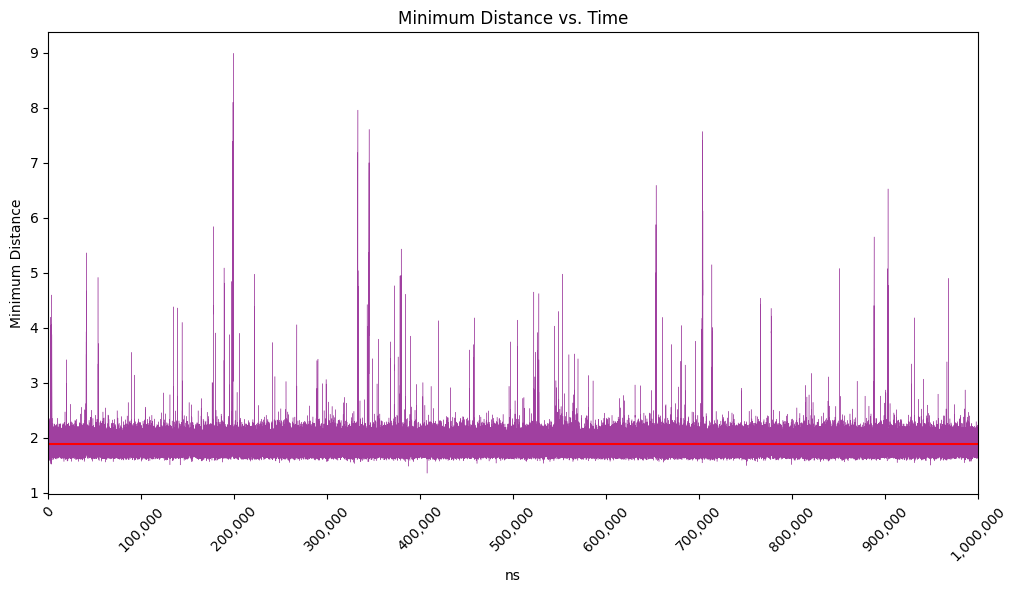

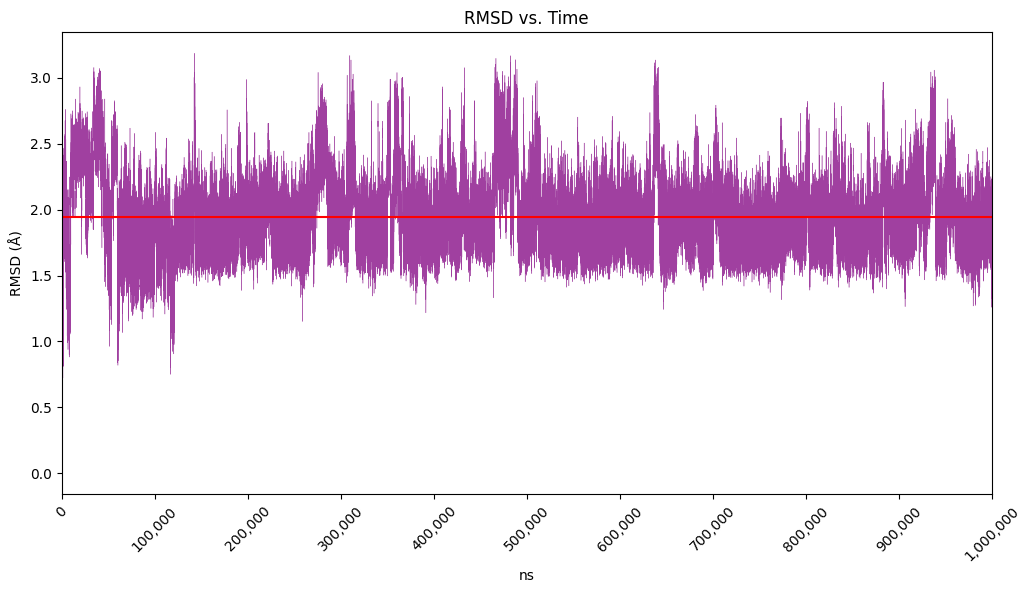

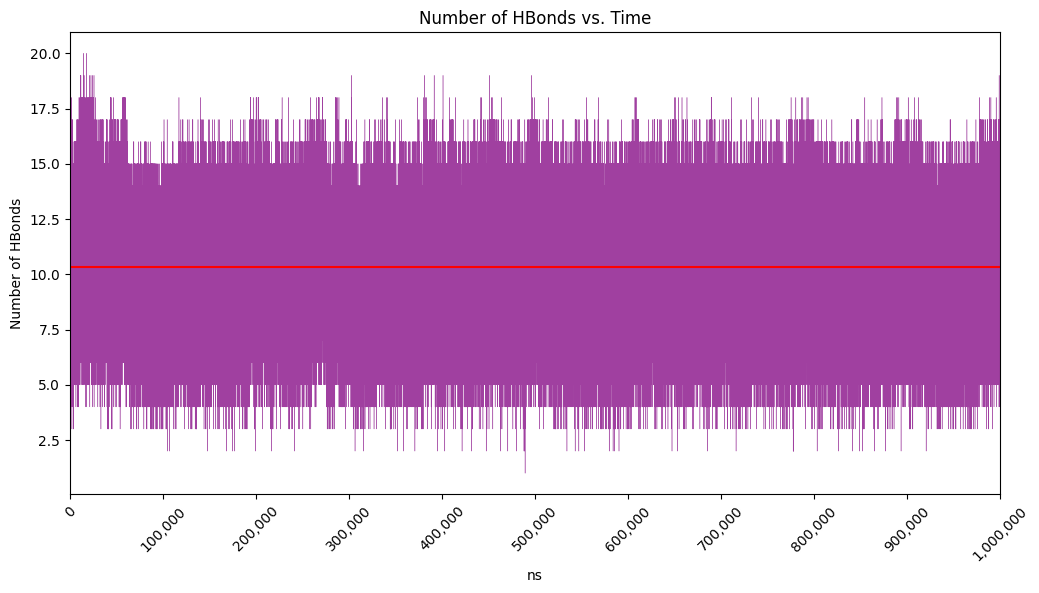

In [12]:
## ____________________MinimumDistance ______________________
# Usage:
# Initialize the class with the .txt file path
minDistAnalysis = MinDistAnalysis('minDist.txt')

# Convert .txt to .csv
minDistAnalysis.convert_txt_to_csv()

# Analyze and plot the data
minDistAnalysis.analyze_and_plot()


## ____________________RMSD ______________________
# Usage:
# Initialize the class with the .txt file path
rmsdAnalysis = RMSDAnalysis('rmsd.txt')

# Convert .txt to .csv and analyze data
rmsdAnalysis.convert_txt_to_csv()

# Analyze and plot the data
rmsdAnalysis.analyze_and_plot()


## ____________________HBonds______________________
# Usage:
# Initialize the class with the .txt file path
hbondsAnalysis = HBondsAnalysis('HBonds.txt')

# Convert .txt to .csv 
hbondsAnalysis.convert_txt_to_csv()

# Analyze and plot the data
hbondsAnalysis.analyze_and_plot()